In [2]:
import os, sys
path_to_package = os.path.abspath(os.path.join('../../'))
if path_to_package not in sys.path:
    sys.path.append(path_to_package)


from src.io import get_filepaths, read_phylip_file
from src.models import data_preparation
from src.utils import get_filename

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

In [3]:
# Filepaths
original_fps = get_filepaths('/home/khaldrem/code/sc_regmod/dataset/original')
clean_fps = get_filepaths('/home/khaldrem/code/sc_regmod/dataset/clean')

In [4]:
print(f"Cantidad de archivos original: {len(original_fps)}")
print(f"Cantidad de archivos clean   : {len(clean_fps)}")
print(f"Diferencia: {len(original_fps)- len(clean_fps)}")

Cantidad de archivos original: 6015
Cantidad de archivos clean   : 5977
Diferencia: 38


In [5]:
df_files = {}

filenames = []
original_length = []
clean_length = []

for f in original_fps:
    data = read_phylip_file(f)
    filename = get_filename(f)

    filenames.append(filename)
    original_length.append(data.get_alignment_length())

    clean_path = f"/home/khaldrem/code/sc_regmod/dataset/clean/{filename}.phylip"
    if os.path.exists(clean_path):
        data2 = read_phylip_file(clean_path)
        clean_length.append(data2.get_alignment_length())
    else:
        clean_length.append(-1)


df_files["filenames"] = filenames
df_files["Original"] = original_length
df_files["Proceso_1"] = clean_length

df_len = pd.DataFrame.from_dict(df_files)

6015
6015


In [6]:
# Crea columna percentage, con el porcentaje de cambio
df_len.loc[df_len['Proceso_1']!= -1, 'percentage'] = 1 - (df_len["Proceso_1"]/df_len["Original"])

In [32]:
print(f"Cantidad de archivos que presentaron un 50% o mas de: {df_len.loc[(df_len['Proceso_1'] != -1) & (df_len['percentage'] >= 0.5)].shape[0]}")

Cantidad de archivos que presentaron un 50% o mas de: 5905


In [29]:
print(f"Cantida de archivos que fueron eliminados: {df_len.loc[(df_len['Proceso_1'] == -1)].shape[0]}")

Cantida de archivos que fueron eliminados: 38


In [31]:
print("Nombres: ")
df_len.loc[(df_len['Proceso_1'] == -1)]["filenames"].tolist()

Nombres: 


['YLR159W',
 'YAR060C',
 'YEL076C',
 'YPR203W',
 'YBL111C',
 'YLR466W',
 'YIL176C',
 'YLR156W',
 'YIL173W',
 'YPL282C',
 'YLR464W',
 'YDR545W',
 'YDL246C',
 'YFL068W',
 'YDR039C',
 'YOR396W',
 'YJR158W',
 'YLR158C',
 'YIL172C',
 'YHR214W',
 'YGR296W',
 'YLR157C',
 'YLR467W',
 'YNL339C',
 'YOR394W',
 'YCL067C',
 'YML133C',
 'YPL283C',
 'YEL075C',
 'YHR218W',
 'YHR212C',
 'YHR213W',
 'YJL223C',
 'YJL225C',
 'YLR160C',
 'YIL177C',
 'YLR155C',
 'YLR465C']

In [34]:
print("Datos originales: ")
print(f"mean: {df_len['Original'].mean()}")
print(f"std: {df_len['Original'].std()}")
print(f"var: {df_len['Original'].var()}")
print()
print("Datos proceso 1: ")
print(f"mean: {df_len['Proceso_1'].mean()}")
print(f"std: {df_len['Proceso_1'].std()}")
print(f"var: {df_len['Proceso_1'].var()}")

Datos originales: 
mean: 1468.6701579384871
std: 1132.1291967159752
var: 1281716.5180567594

Datos proceso 1: 
mean: 220.27946799667498
std: 264.94544155237764
var: 70196.08699938437


Text(0, 0.5, 'Largo de las secuencias')

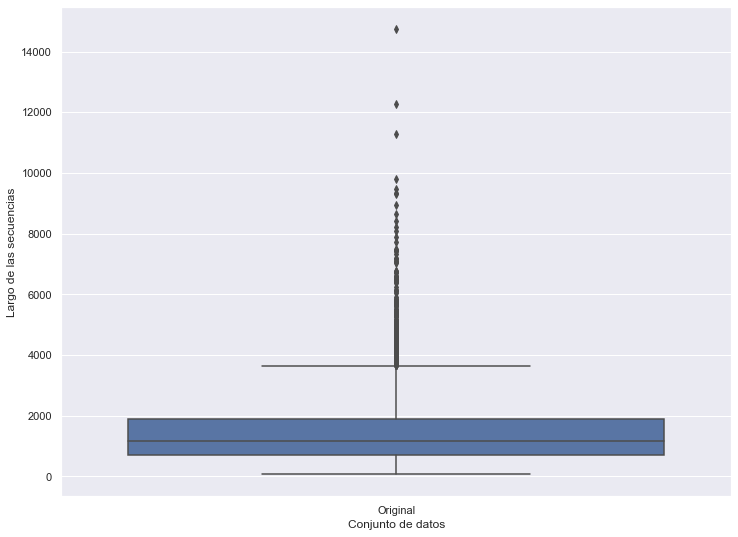

In [35]:
#Original
sns.set(rc={'figure.figsize':(12,9)})

pt = df_len[["Original"]]
b = sns.boxplot(data=pt)

plt.xlabel("Conjunto de datos")
plt.ylabel("Largo de las secuencias")

Text(0, 0.5, 'Largo de las secuencias')

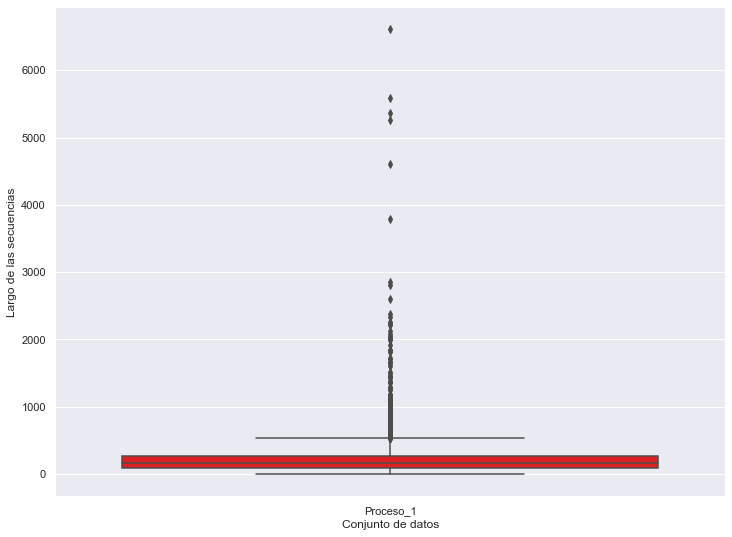

In [36]:
#Proceso 1
sns.set(rc={'figure.figsize':(12,9)})


pt = df_len[df_len["Proceso_1"] != -1]
pt = pt[["Proceso_1"]]
b = sns.boxplot(data=pt, color="red")

plt.xlabel("Conjunto de datos")
plt.ylabel("Largo de las secuencias")